<a href="https://colab.research.google.com/github/bhoop70233/Alzheimer-s-Disease/blob/main/Alzheimer's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv('alzheimers_disease_data.csv')

In [4]:
data.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [6]:
print(data.isnull().sum())

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [7]:
#Drop the 'DoctorInCharge' column
data=data.drop('DoctorInCharge',axis=1)

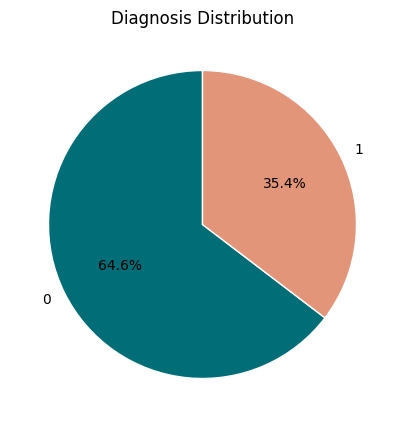

In [8]:
#Diagnosis Distribution
plt.figure(figsize=(5,5))
data['Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['#006d77','#e29578'],wedgeprops={'linewidth':1,'edgecolor':'white'})

plt.title('Diagnosis Distribution')

plt.ylabel('')
plt.show()

In [9]:
#Correlation matrix
correlation_matrix=data.corr()
print("Correaltion Matrix:\n",correlation_matrix)

Correaltion Matrix:
                            PatientID       Age    Gender  Ethnicity  \
PatientID                   1.000000  0.002947 -0.043665  -0.007608   
Age                         0.002947  1.000000  0.028708   0.027745   
Gender                     -0.043665  0.028708  1.000000  -0.003660   
Ethnicity                  -0.007608  0.027745 -0.003660   1.000000   
EducationLevel             -0.001729 -0.060560 -0.007070   0.026516   
BMI                        -0.034228 -0.015677  0.005928  -0.003176   
Smoking                     0.021907  0.020060  0.016650   0.031485   
AlcoholConsumption         -0.020733  0.007323  0.004330   0.008363   
PhysicalActivity           -0.011424 -0.010249 -0.035795   0.020498   
DietQuality                -0.018490 -0.023386  0.010942  -0.018184   
SleepQuality               -0.026069  0.049139  0.007310   0.029304   
FamilyHistoryAlzheimers     0.002187 -0.018784  0.018421   0.022526   
CardiovascularDisease       0.017675 -0.015284  0.034577

<function matplotlib.pyplot.show(close=None, block=None)>

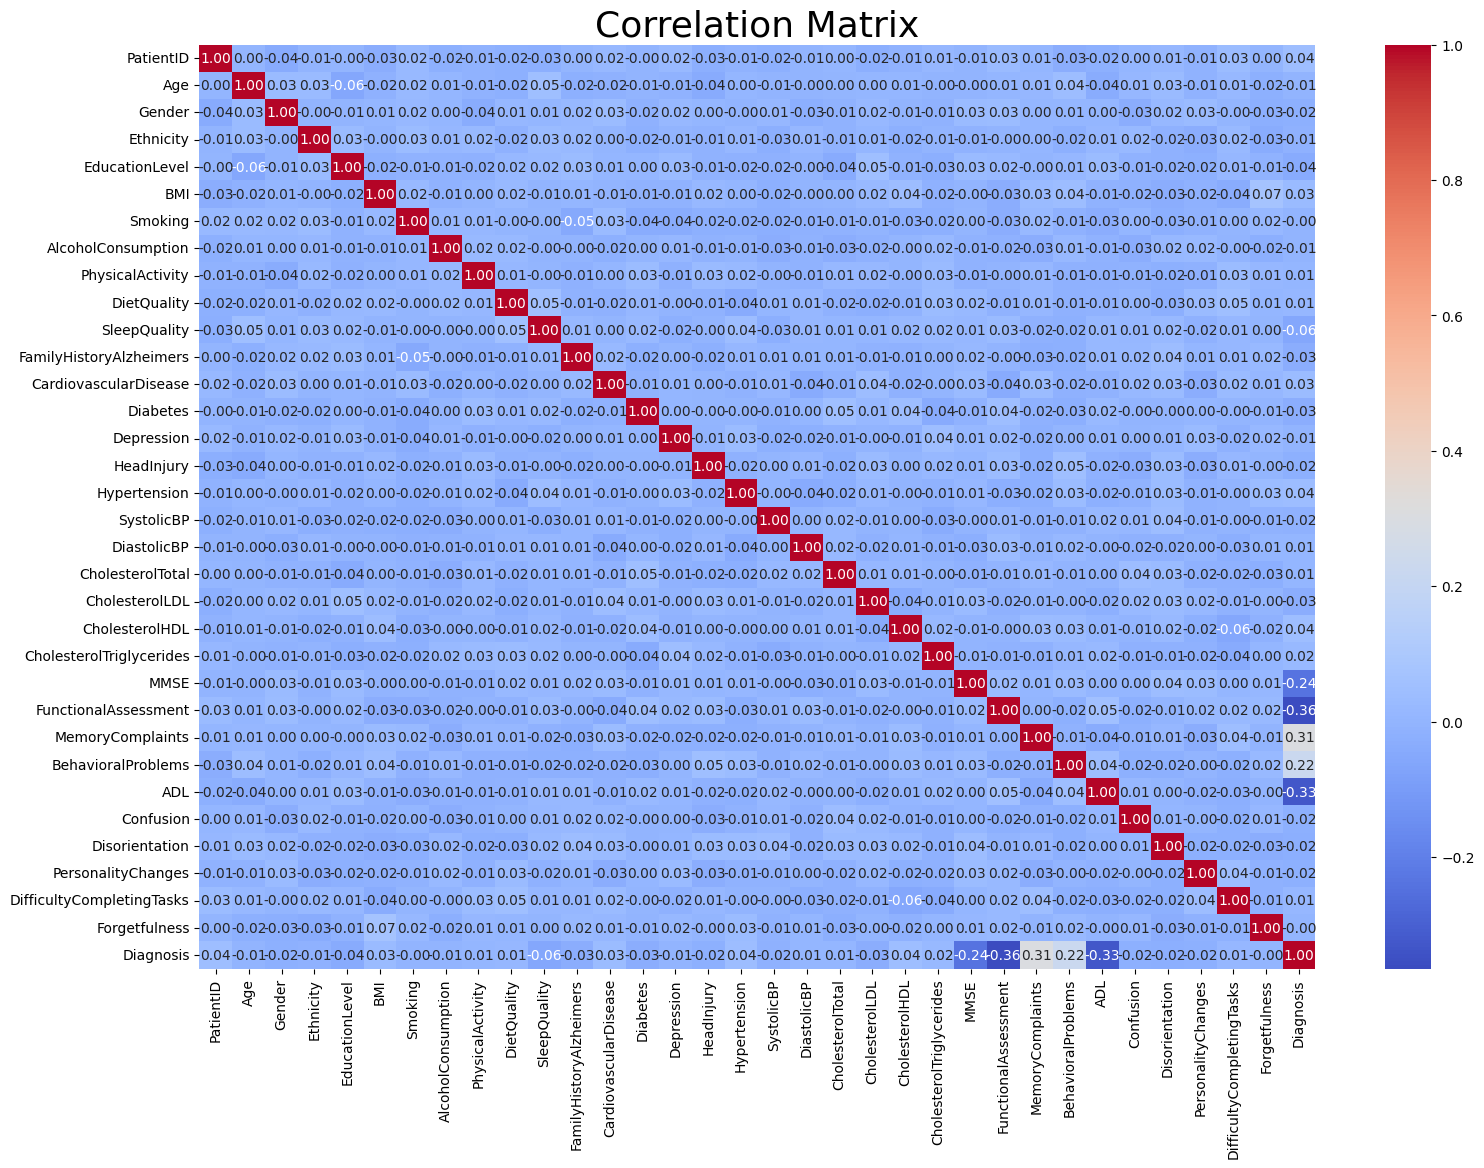

In [10]:
#Correlation heatmap
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix',fontsize=26)
plt.show

In [11]:
# Select X and Y variables
X=data.drop('Diagnosis',axis=1)
Y=data['Diagnosis']

In [12]:
# Select only numerical columns for histogram plots
numerical_cols=X.select_dtypes(include=['int64','float64']).columns

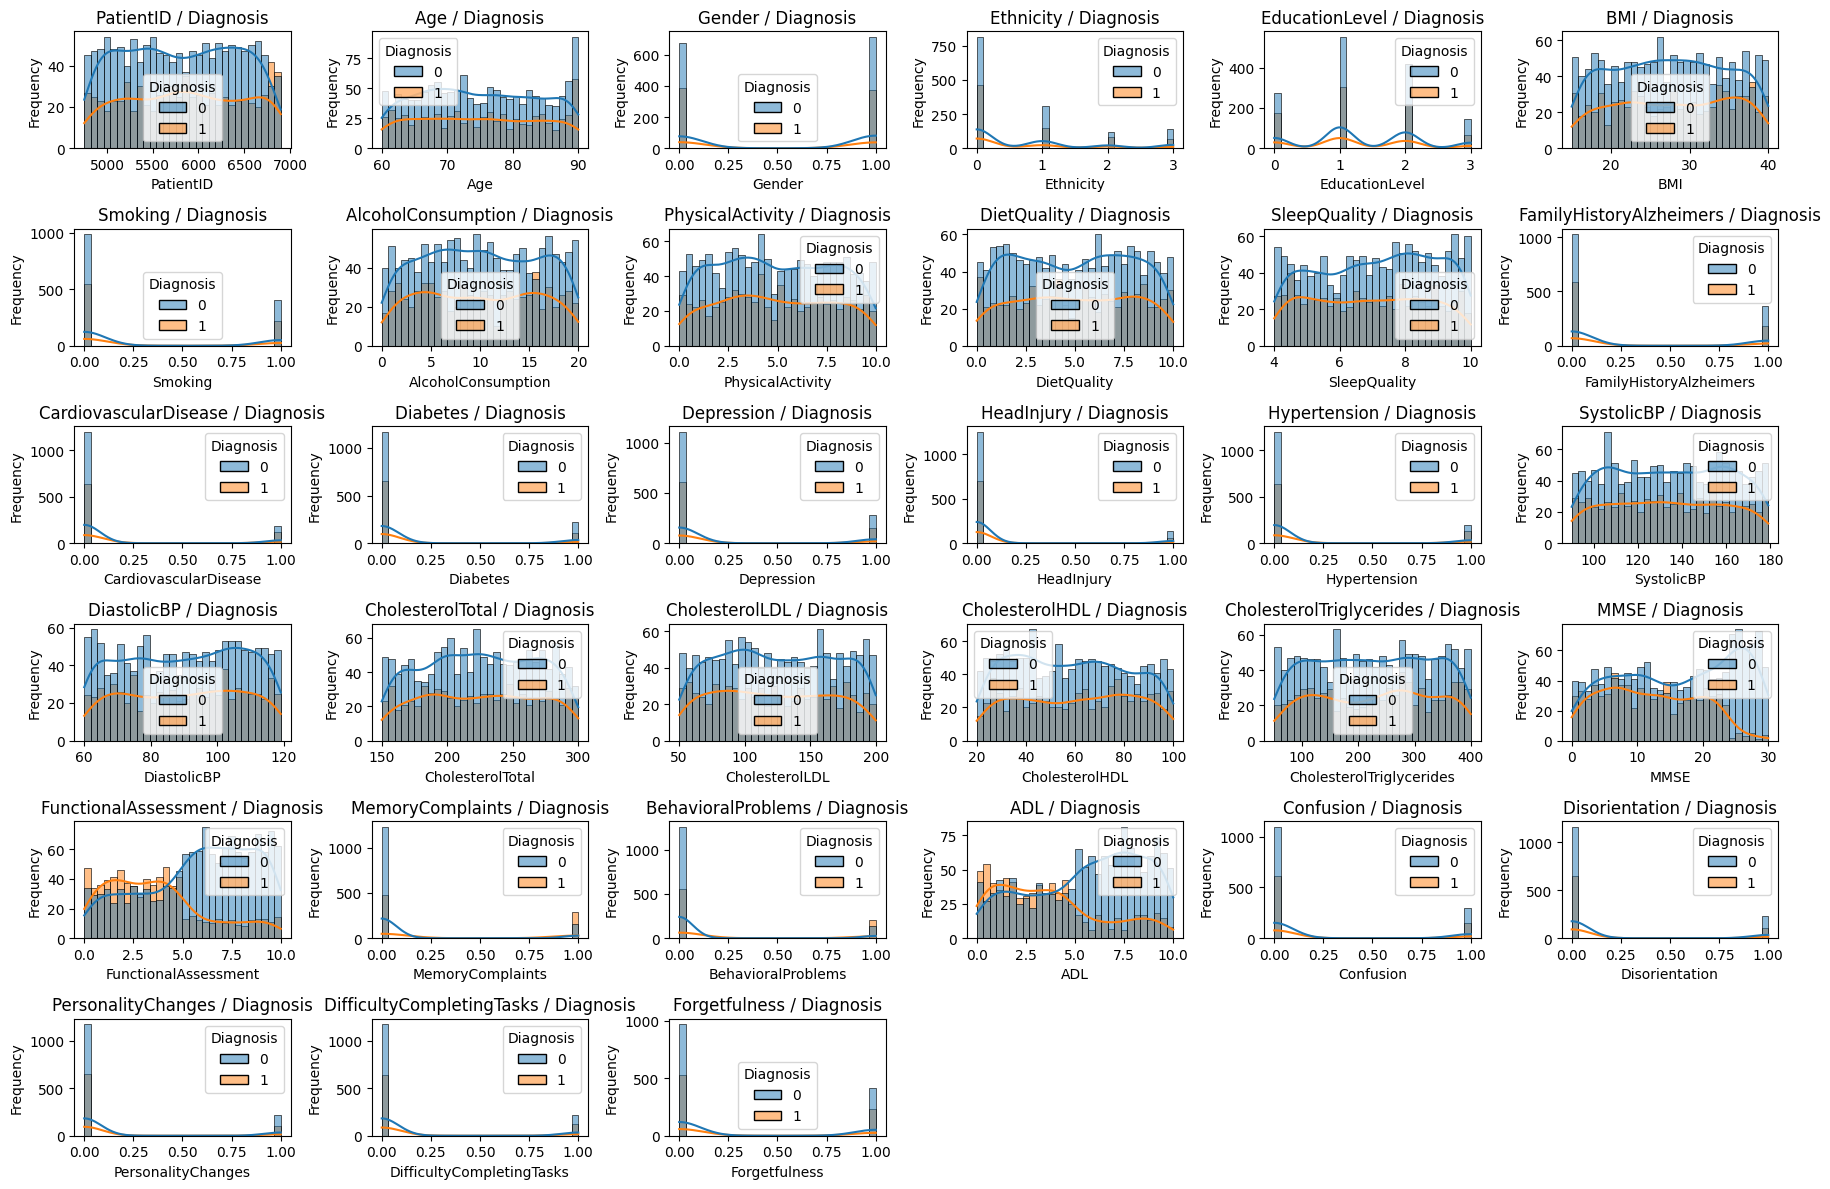

In [14]:
# Number of subplots
n_cols=6
n_rows=6

# Set up the matplotlib figure for histograms
fig,axes=plt.subplots(n_rows,n_cols,figsize=(18,12))
axes=axes.flatten()

# Plot each numerical column based on Diagnosis
for i, col in enumerate(numerical_cols):
    if col!='Diagnosis':
        sns.histplot(data=data,x=col,hue='Diagnosis',ax=axes[i],kde=True,bins=30)
        axes[i].set_title(f'{col} / Diagnosis')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
# Remove any empty subplots

for i in range(len(numerical_cols),len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

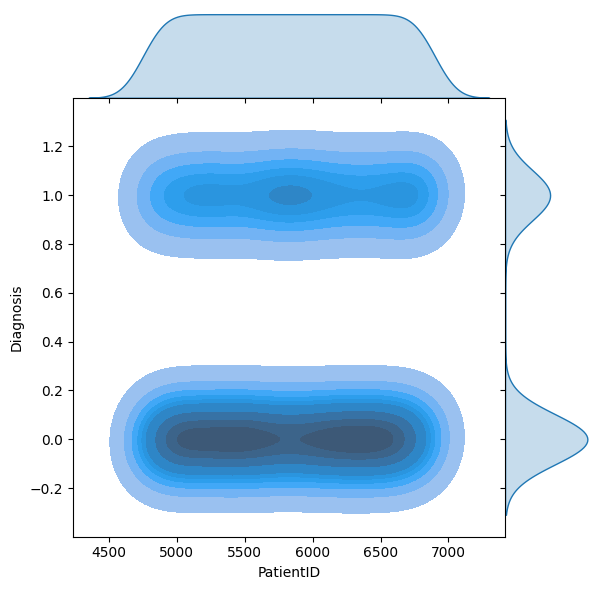

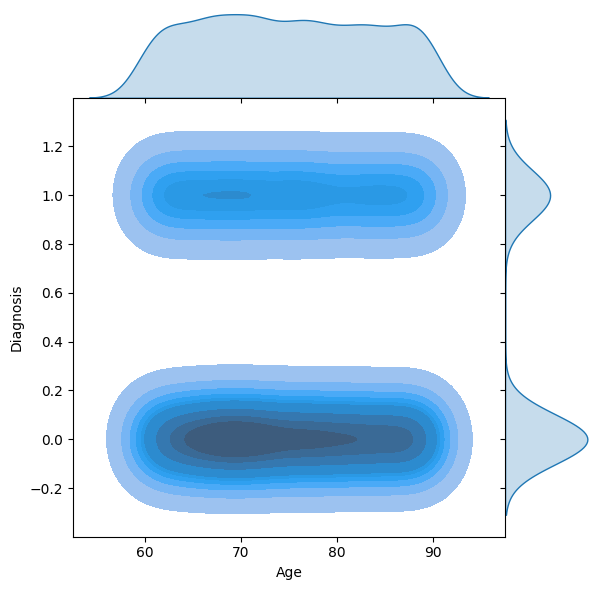

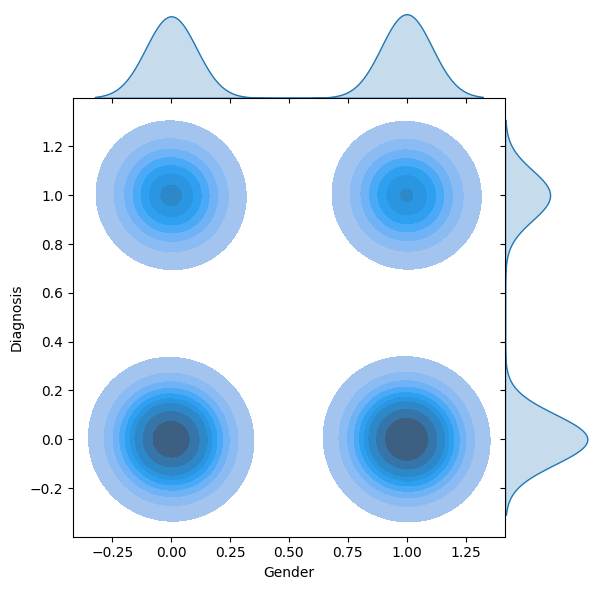

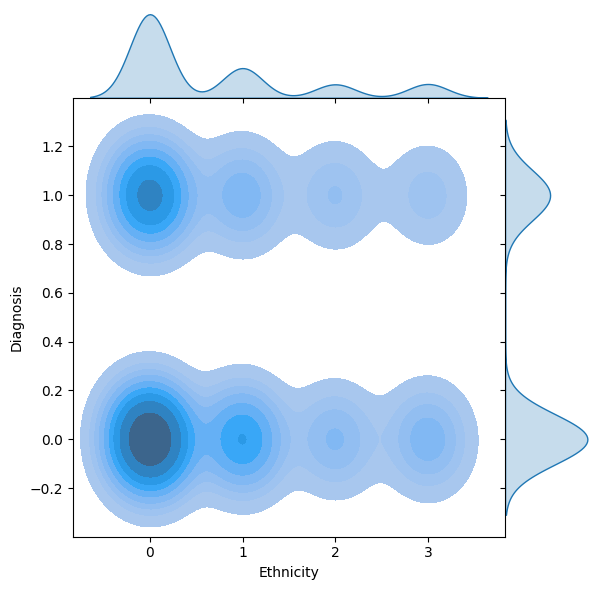

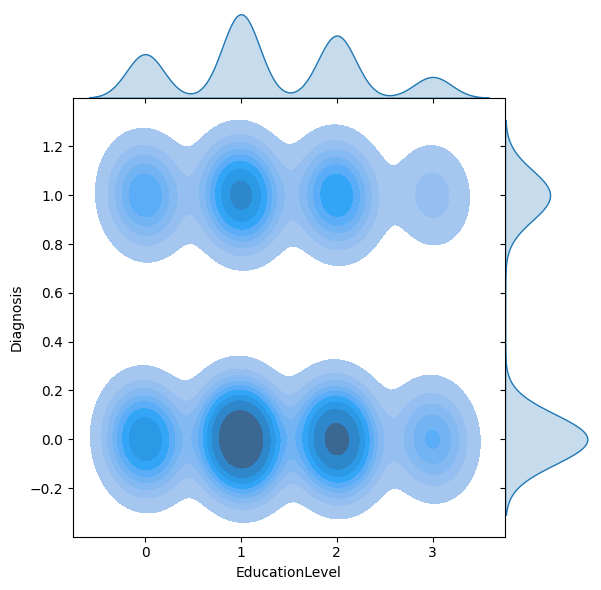

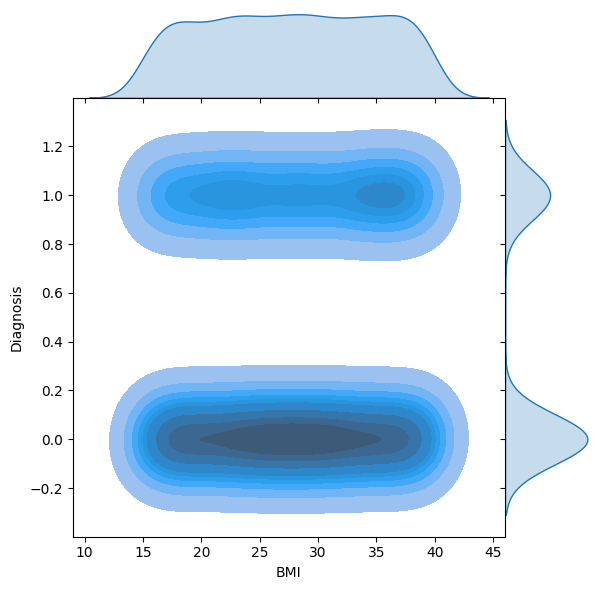

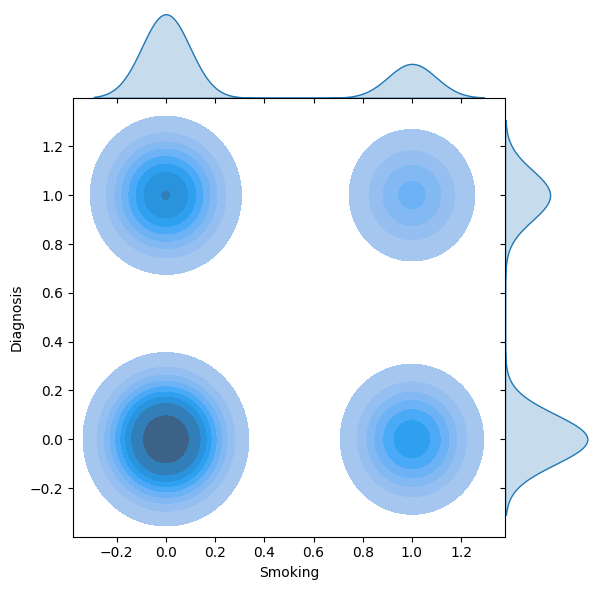

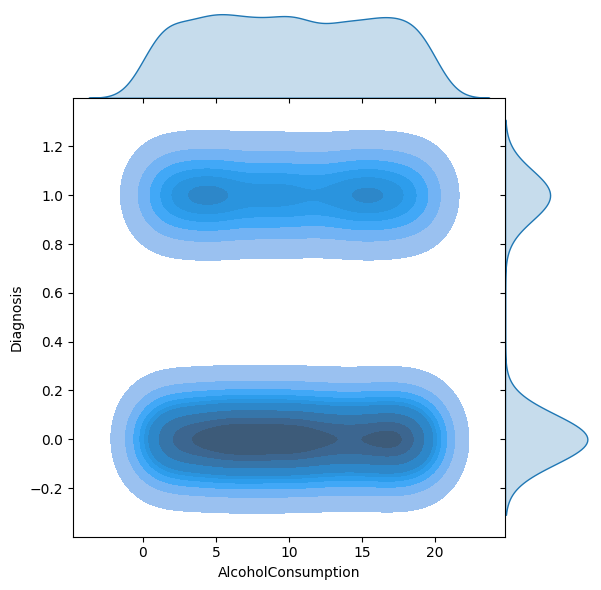

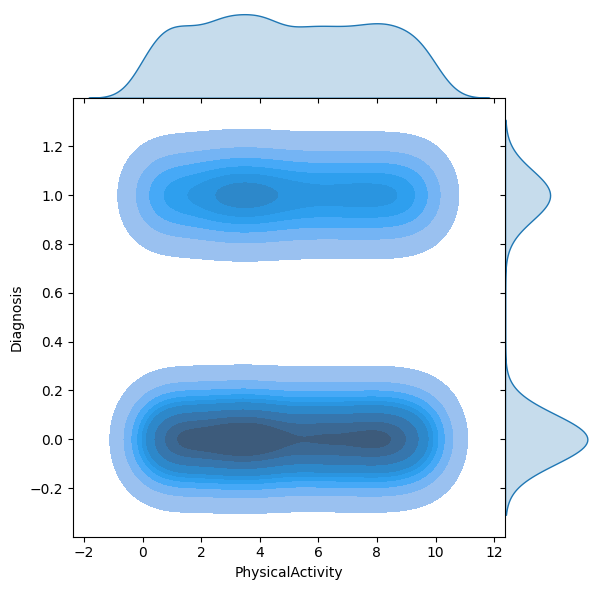

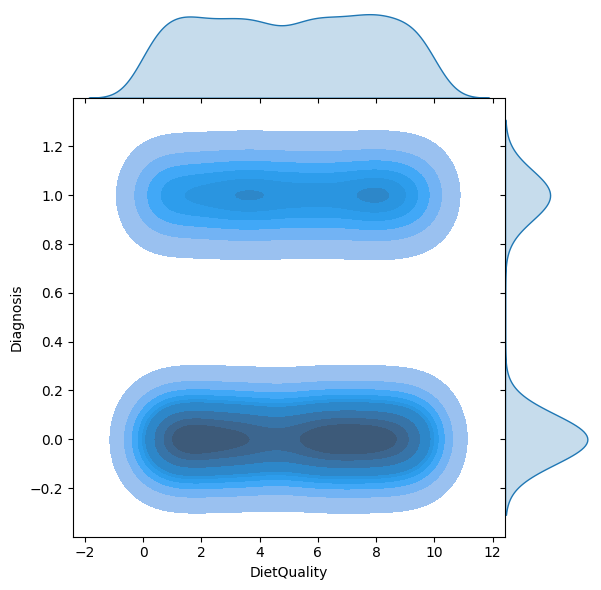

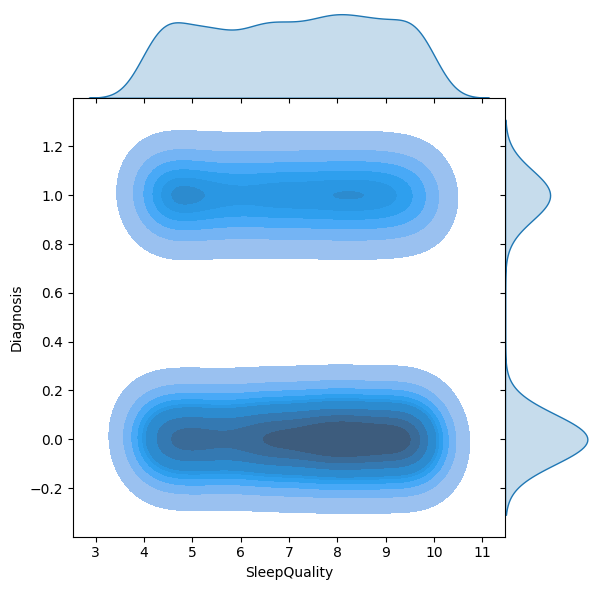

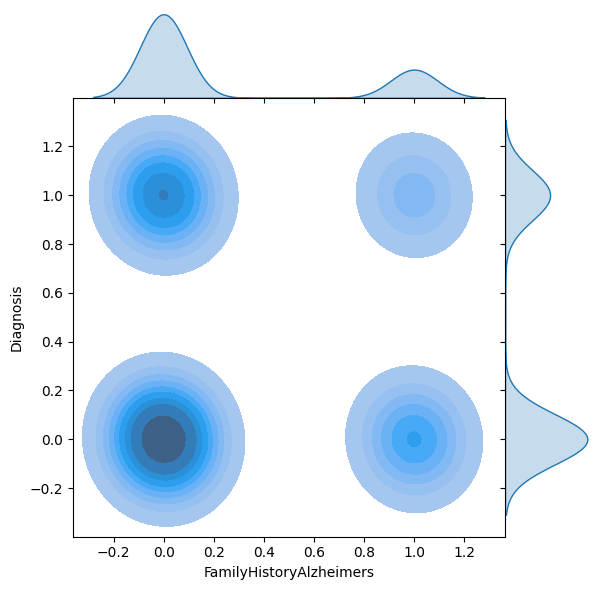

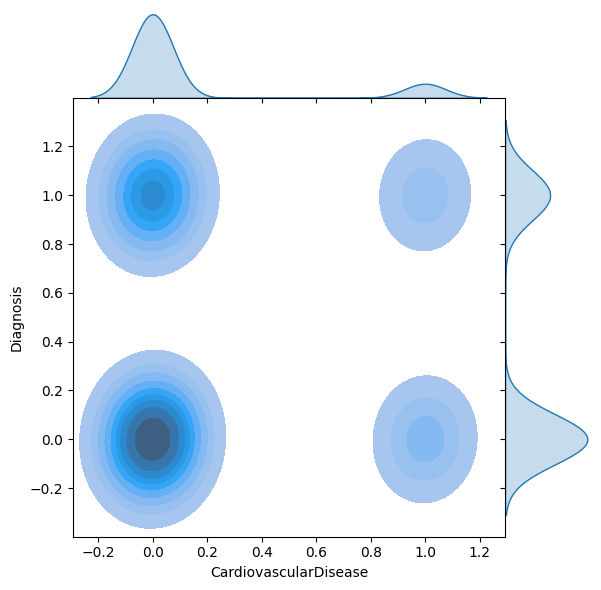

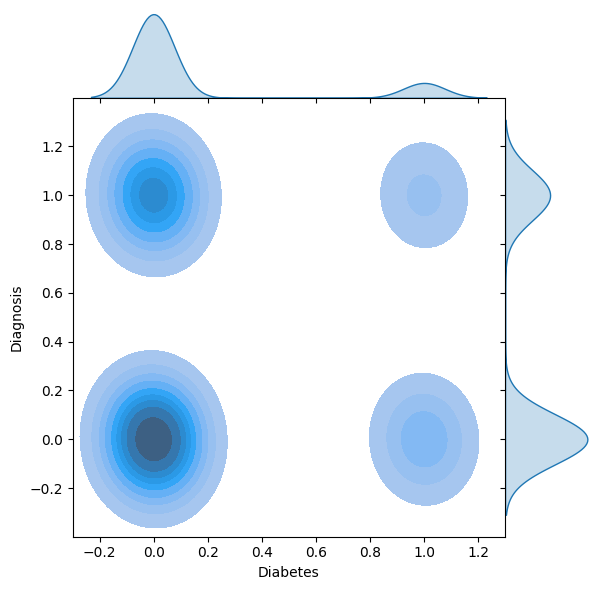

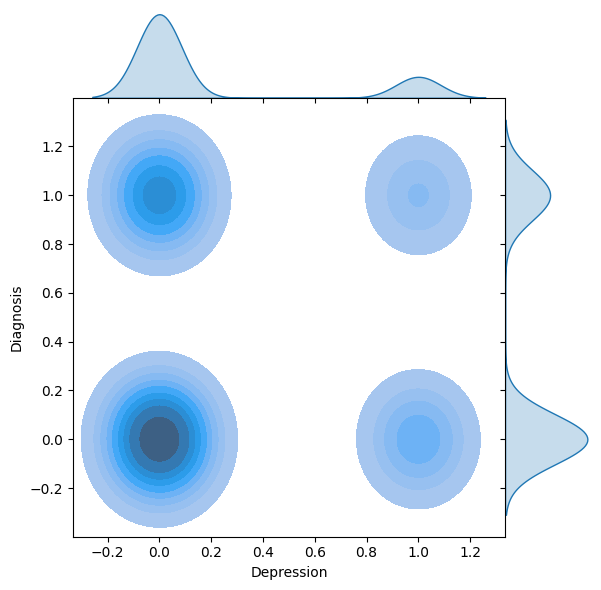

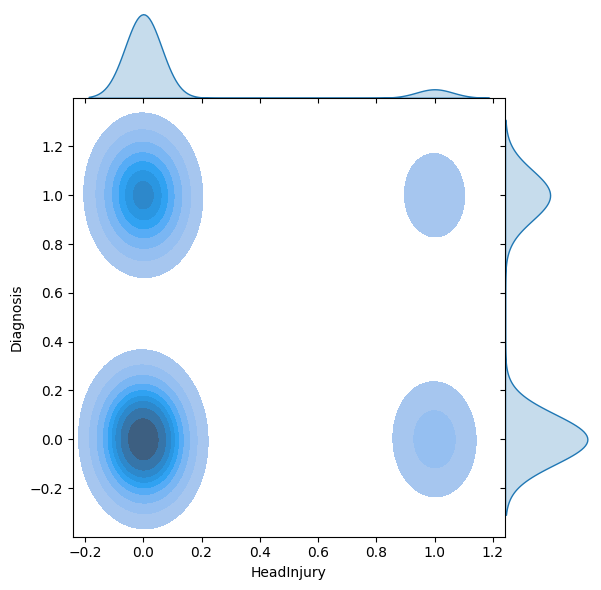

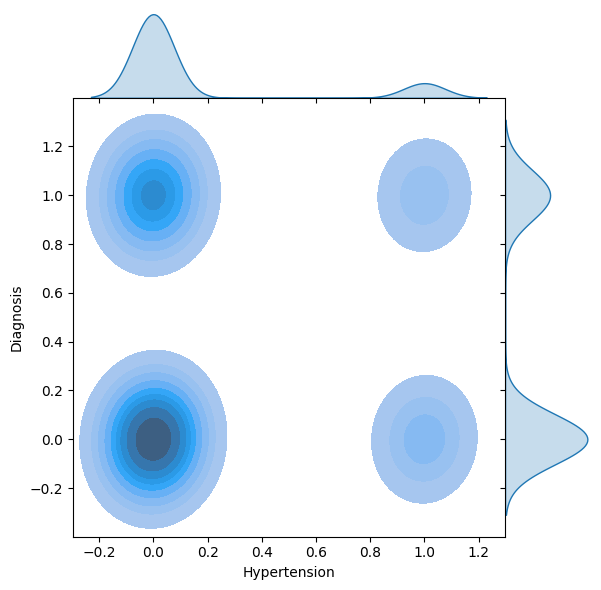

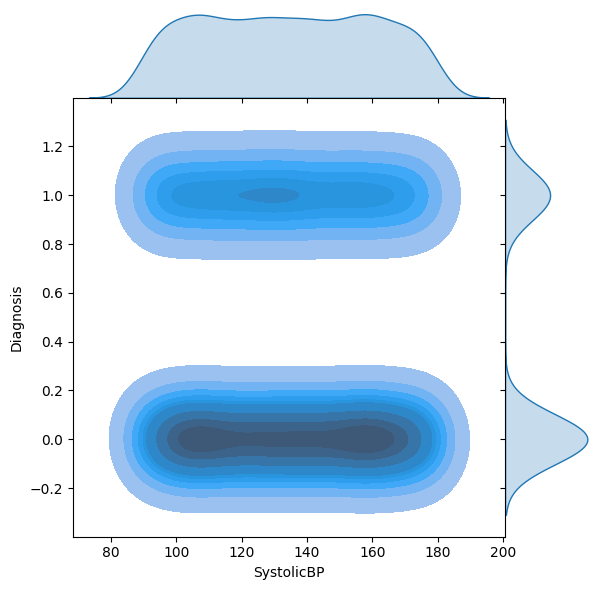

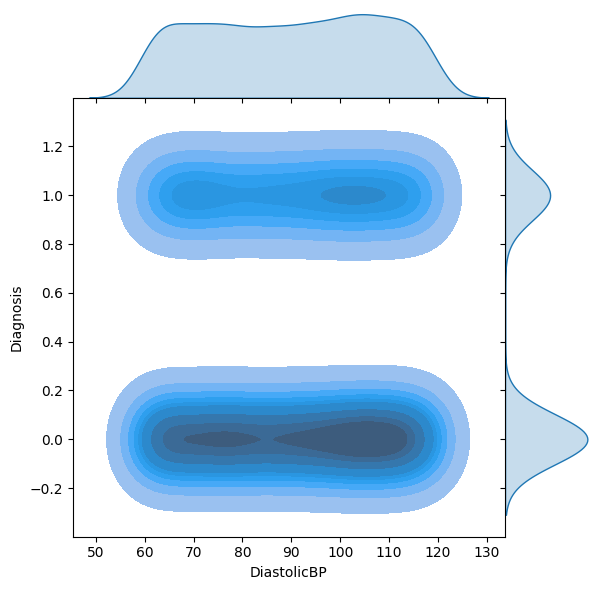

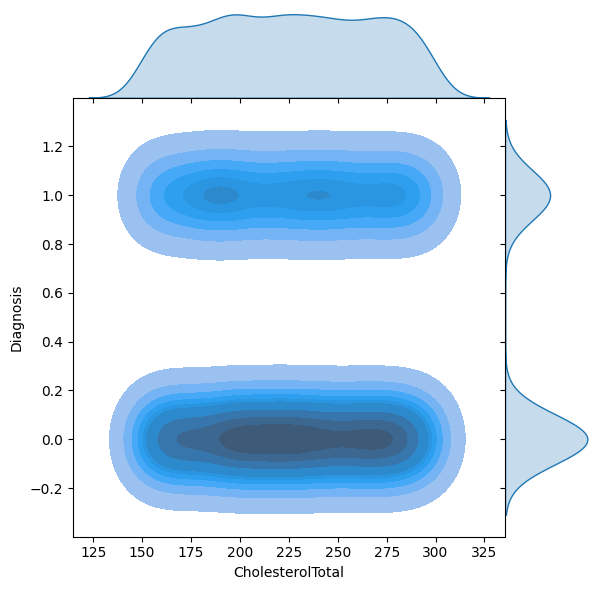

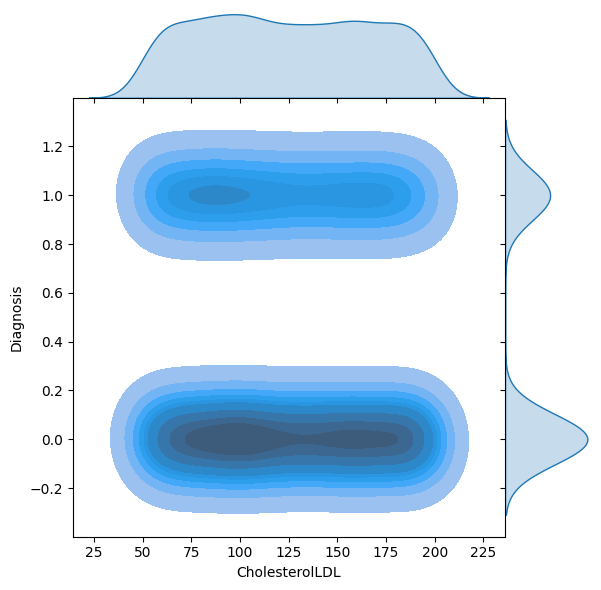

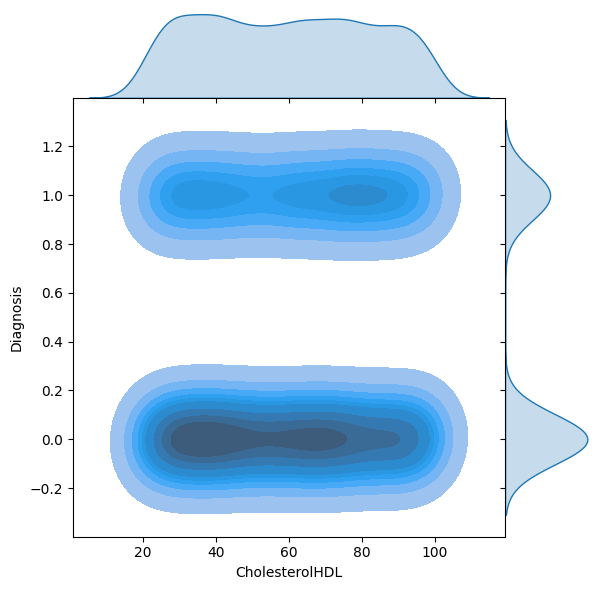

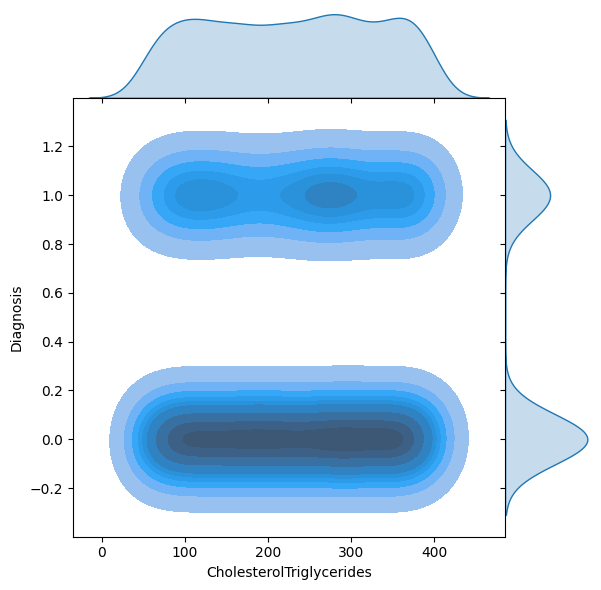

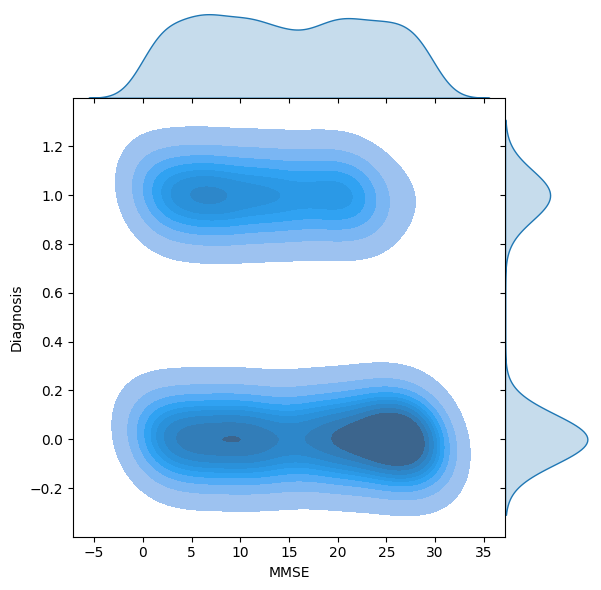

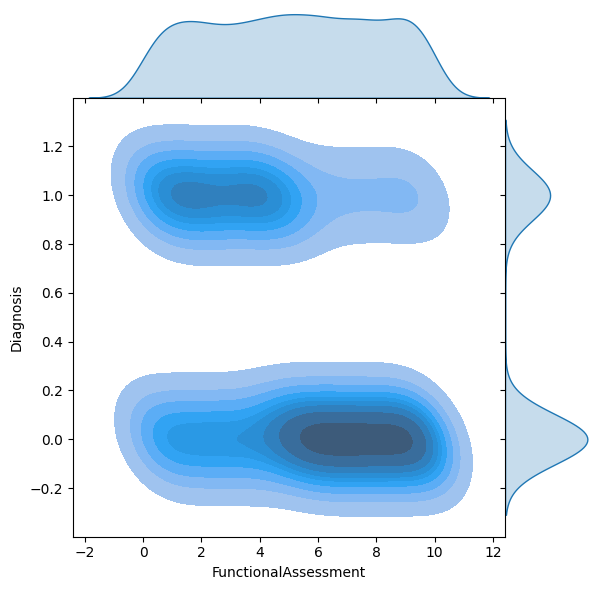

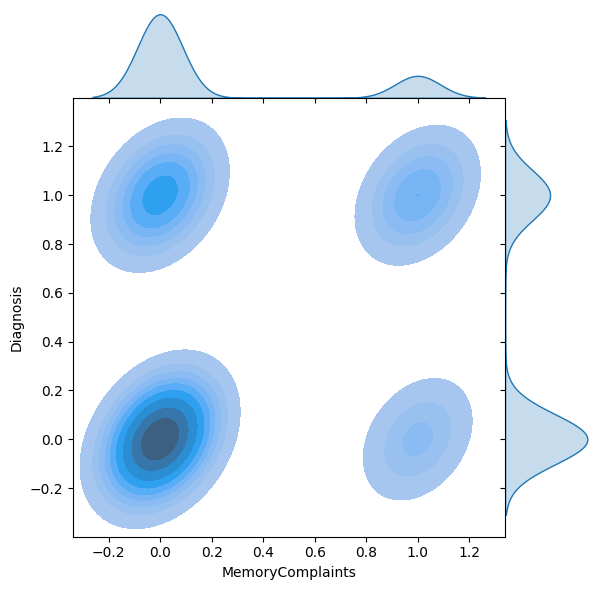

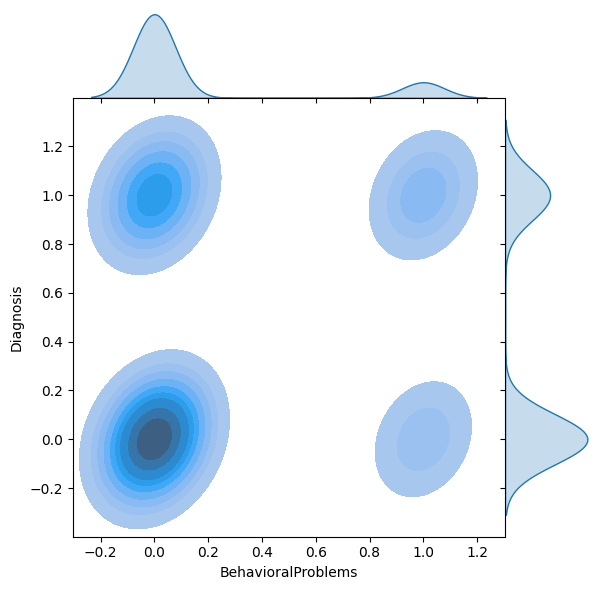

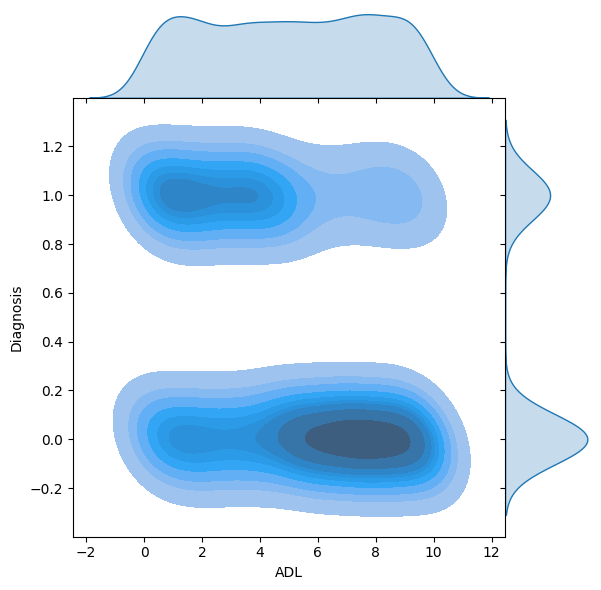

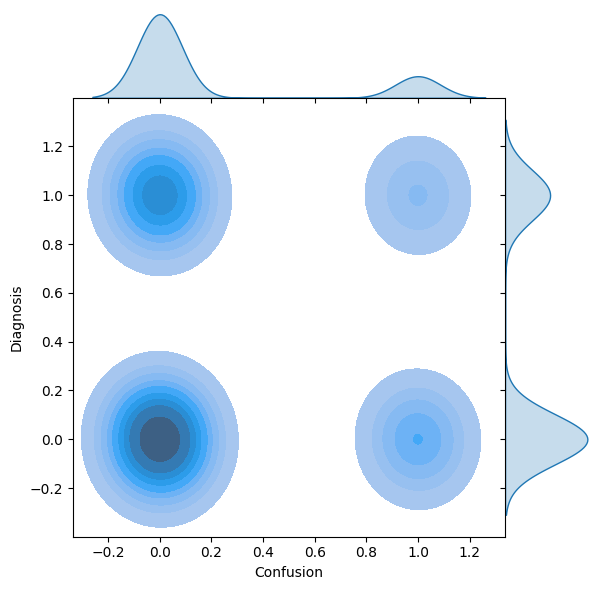

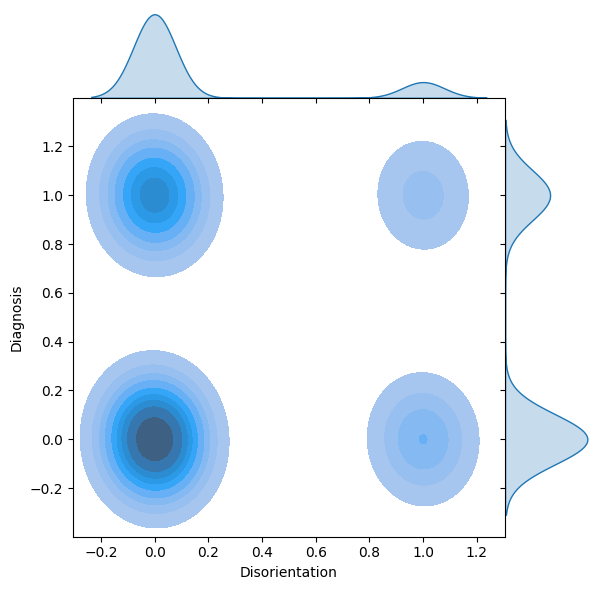

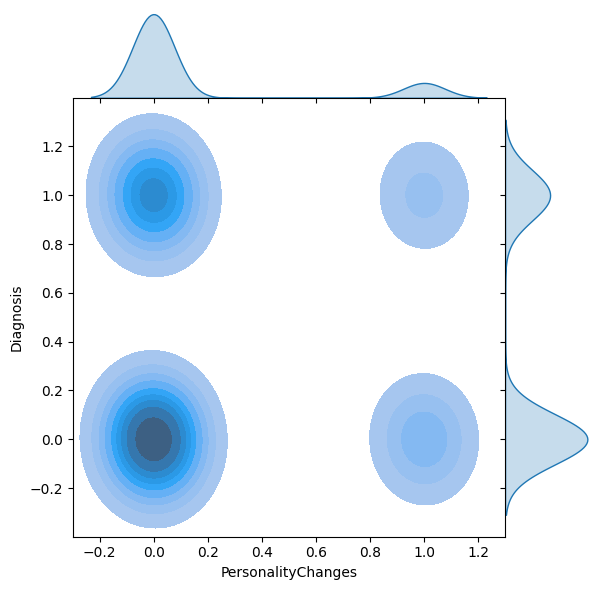

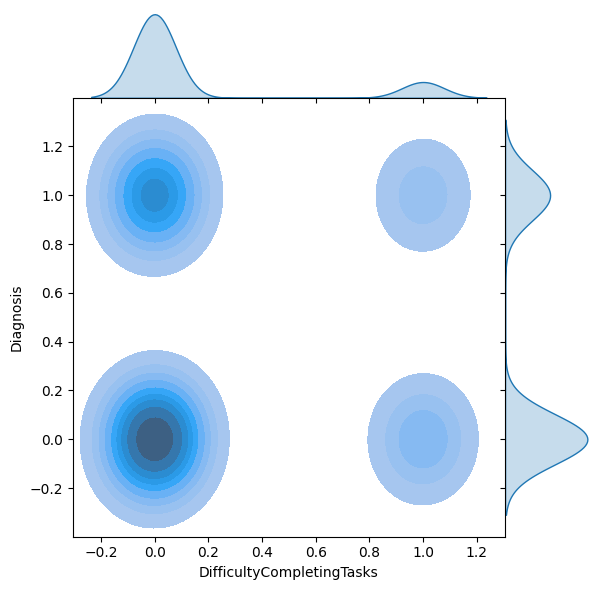

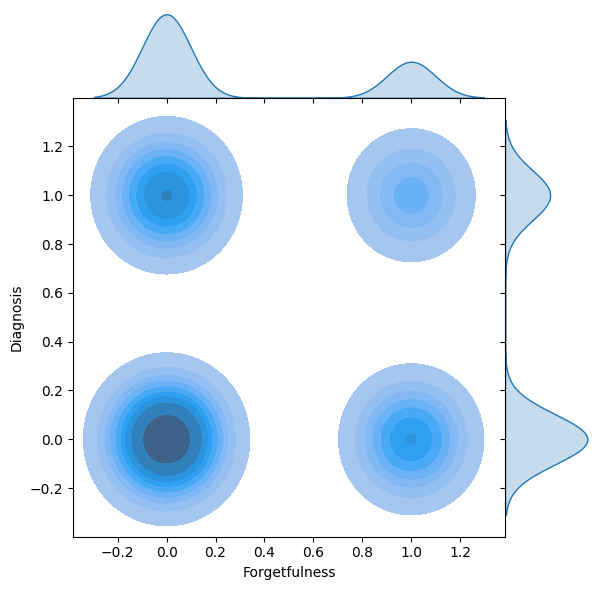

In [16]:
for col in numerical_cols:
  if col!='Diagnosis':
    sns.jointplot(x=col,y='Diagnosis',data=data,kind='kde',height=6,fill=True,space=0)
    plt.title(f' Joint Plot of {col} vs Diagnosis')
    plt.show()

In [17]:
#Apply SelectKBest class to extract top 10 best features
best_features=SelectKBest(score_func=f_classif,k=10)
fit=best_features.fit(X,Y)
selected_features=X.columns[fit.get_support(indices=True)]

In [18]:
# Subset your data with selected features
X_selected=X[selected_features]

In [19]:
# Split data into training and testing sets

X_train,X_test,Y_train,Y_test=train_test_split(X_selected,Y,test_size=0.2,random_state=42)

In [20]:
# Standardize the data
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
#Define classifiers
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)

In [22]:
#Function to train and evaluate a classifier
def train_and_evaluate(classifier, X_train, X_test, Y_train, Y_test):
  classifier.fit(X_train, Y_train)
  y_pred = classifier.predict(X_test)

  # Print classification report and confusion matrix
  print(classification_report(Y_test, y_pred))
  print("Confusion Matrix:")
  print(confusion_matrix(Y_test, y_pred))


In [23]:
# Train and evaluate Random Forest
print("Random Forest:")
train_and_evaluate(rf_classifier, X_train, X_test, Y_train, Y_test)

Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430

Confusion Matrix:
[[271   6]
 [ 13 140]]


In [24]:
# Train and evaluate Gradient Boosting

print(f"Gradient Boosting:")
train_and_evaluate(gb_classifier, X_train, X_test, Y_train, Y_test)

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       277
           1       0.95      0.95      0.95       153

    accuracy                           0.96       430
   macro avg       0.96      0.96      0.96       430
weighted avg       0.96      0.96      0.96       430

Confusion Matrix:
[[269   8]
 [  8 145]]


In [25]:
#Define a neural network classifier with enhanced parameters
def create_nn_classifier(input_dim):
  model = Sequential([
      Dense(256, activation='relu', input_dim=input_dim),
      Dropout(0.4),
      Dense(128, activation='relu'),
      Dropout(0.4),
      Dense(64, activation='relu'),
      Dropout(0.3),
      Dense(1, activation='sigmoid'),

  ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [26]:
# Create an instance of the neural network classifier
nn_classifier=create_nn_classifier(input_dim=X_train.shape[1])

In [27]:
# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = nn_classifier.fit(X_train, Y_train, epochs=100, batch_size=64,
                            validation_data=(X_test, Y_test), verbose=1, callbacks=[early_stopping])

Epoch 1/100
27/27 [==============================] - 3s 22ms/step - loss: 0.5947 - accuracy: 0.6894 - val_loss: 0.4502 - val_accuracy: 0.8023
Epoch 2/100
27/27 [==============================] - 0s 10ms/step - loss: 0.4249 - accuracy: 0.8232 - val_loss: 0.3750 - val_accuracy: 0.8465
Epoch 3/100
27/27 [==============================] - 0s 9ms/step - loss: 0.3777 - accuracy: 0.8400 - val_loss: 0.3597 - val_accuracy: 0.8442
Epoch 4/100
27/27 [==============================] - 0s 11ms/step - loss: 0.3591 - accuracy: 0.8482 - val_loss: 0.3412 - val_accuracy: 0.8442
Epoch 5/100
27/27 [==============================] - 0s 13ms/step - loss: 0.3453 - accuracy: 0.8424 - val_loss: 0.3308 - val_accuracy: 0.8512
Epoch 6/100
27/27 [==============================] - 0s 18ms/step - loss: 0.3247 - accuracy: 0.8598 - val_loss: 0.3254 - val_accuracy: 0.8581
Epoch 7/100
27/27 [==============================] - 0s 13ms/step - loss: 0.3198 - accuracy: 0.8592 - val_loss: 0.3283 - val_accuracy: 0.8535
Epoch 8

In [28]:
# Evaluate the model
y_pred_prob = nn_classifier.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

14/14 [==============================] - 0s 2ms/step


In [29]:
print("\nNeural Network Classifier:")
print(classification_report(Y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))


Neural Network Classifier:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       277
           1       0.90      0.87      0.89       153

    accuracy                           0.92       430
   macro avg       0.92      0.91      0.91       430
weighted avg       0.92      0.92      0.92       430

Confusion Matrix:
[[263  14]
 [ 20 133]]


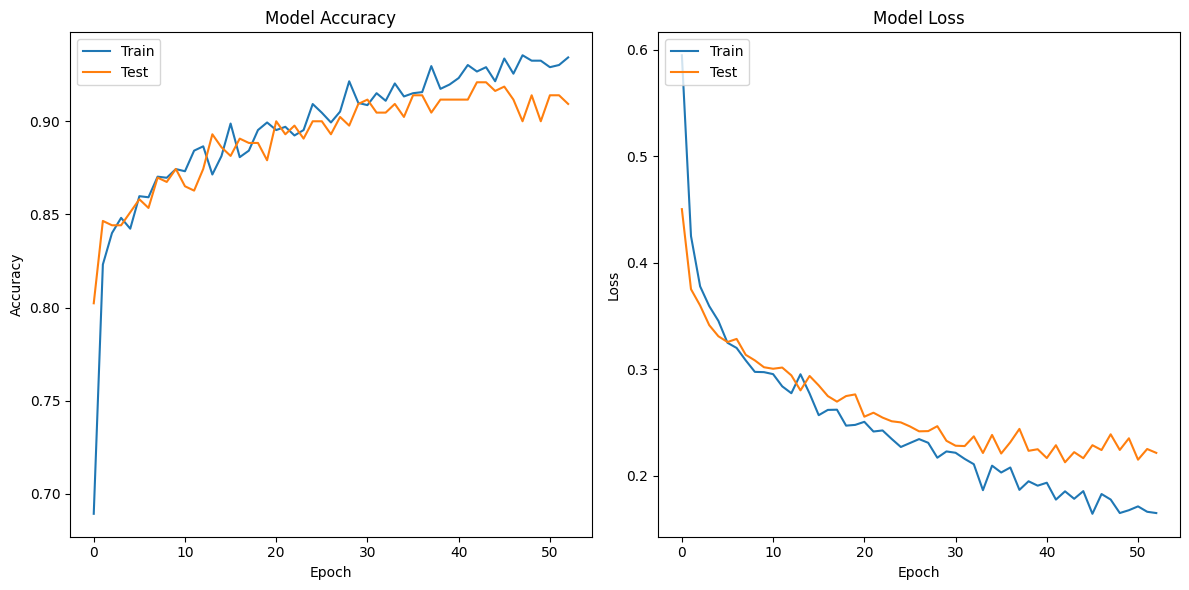

In [30]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

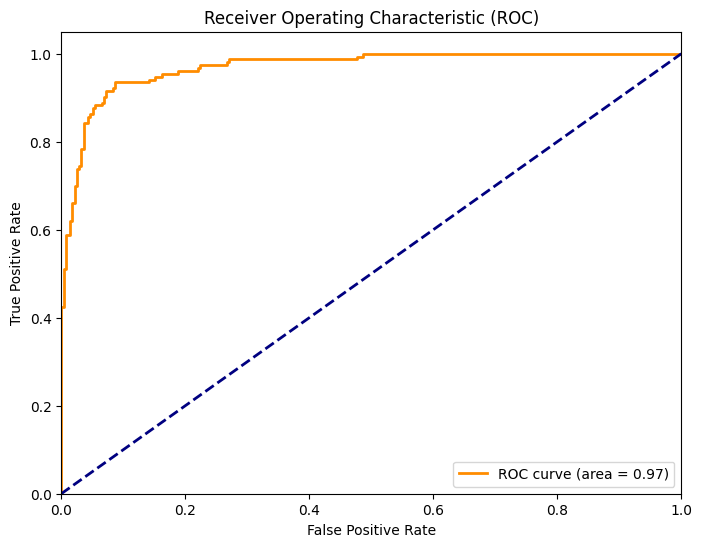

In [31]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()